In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("dataset/Data_Collisions.csv")
df.head()

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [62]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 194673
Columns  : 38

Features :
     : ['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']

Missing values    : 1100024

Unique values :  
 SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE 

In [63]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [64]:
df= df[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','VEHCOUNT','INCDATE','JUNCTIONTYPE','WEATHER'
       ,'ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL']]
df.select_dtypes(exclude=['int','float']).columns

Index(['ADDRTYPE', 'COLLISIONTYPE', 'INCDATE', 'JUNCTIONTYPE', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'INATTENTIONIND', 'UNDERINFL'],
      dtype='object')

In [65]:
df.select_dtypes(exclude=['object']).columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT'], dtype='object')

In [66]:
print('Unique entries of SEVERITYCODE:\n',df.SEVERITYCODE.unique())
print('Datatype of SEVERITYCODE:\n',df.SEVERITYCODE.dtypes)
print('Null values in SEVERITYCODE:\n',df.SEVERITYCODE.isnull().any())

Unique entries of SEVERITYCODE:
 [2 1]
Datatype of SEVERITYCODE:
 int64
Null values in SEVERITYCODE:
 False


In [67]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 194673
Columns  : 14

Features :
     : ['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'INCDATE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'INATTENTIONIND', 'UNDERINFL']

Missing values    : 383514

Unique values :  
 SEVERITYCODE         2
ADDRTYPE             3
COLLISIONTYPE       10
PERSONCOUNT         47
PEDCOUNT             7
VEHCOUNT            13
INCDATE           5985
JUNCTIONTYPE         7
WEATHER             11
ROADCOND             9
LIGHTCOND            9
SPEEDING             1
INATTENTIONIND       1
UNDERINFL            4
dtype: int64


In [68]:
df.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1926
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
VEHCOUNT               0
INCDATE                0
JUNCTIONTYPE        6329
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
INATTENTIONIND    164868
UNDERINFL           4884
dtype: int64

In [69]:
print('Unique Values of SPEEDING: ',df.SPEEDING.unique(),'\n\n')
print('Unique Values of UNDERINFL: ',df.UNDERINFL.unique(),'\n\n')
print('Unique Values of INATTENTIONIND: ',df.INATTENTIONIND.unique())

Unique Values of SPEEDING:  [nan 'Y'] 


Unique Values of UNDERINFL:  ['N' '0' nan '1' 'Y'] 


Unique Values of INATTENTIONIND:  [nan 'Y']


In [70]:
#Change nulls and no to 0 and yes to 1
df.SPEEDING.fillna(value=0,axis=0,inplace=True)
df.SPEEDING.replace(to_replace='Y',value=1,inplace=True)

df.INATTENTIONIND.fillna(value=0,axis=0,inplace=True)
df.INATTENTIONIND.replace(to_replace='Y',value=1,inplace=True)

df.UNDERINFL.replace(to_replace=('Y','N','1','0'),value=(1,0,1,0),inplace=True)

print('SPEEDING unique values: ',df.SPEEDING.unique(),'\n\n')
print('INATTENTIONIND unique values: ',df.INATTENTIONIND.unique(),'\n\n')
print('UNDERINFL unique values:',df.UNDERINFL.unique())

SPEEDING unique values:  [0 1] 


INATTENTIONIND unique values:  [0 1] 


UNDERINFL unique values: [ 0. nan  1.]


In [71]:
df.isnull().sum()

SEVERITYCODE         0
ADDRTYPE          1926
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
VEHCOUNT             0
INCDATE              0
JUNCTIONTYPE      6329
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
SPEEDING             0
INATTENTIONIND       0
UNDERINFL         4884
dtype: int64

In [72]:
print('Unique vaues for ADDRTYPE:','\n',df['ADDRTYPE'].unique(),'\n\n\n')
print('Unique vaues for COLLISIONTYPE:','\n',df['COLLISIONTYPE'].unique(),'\n\n\n')
print('Unique vaues for JUNCTIONTYPE:','\n',df['JUNCTIONTYPE'].unique(),'\n\n\n')
print('Unique vaues for WEATHER:','\n',df['WEATHER'].unique(),'\n\n\n')
print('Unique vaues for ROADCOND:','\n',df['ROADCOND'].unique(),'\n\n\n')
print('Unique vaues for LIGHTCOND:','\n',df['LIGHTCOND'].unique(),'\n\n\n')

Unique vaues for ADDRTYPE: 
 ['Intersection' 'Block' 'Alley' nan] 



Unique vaues for COLLISIONTYPE: 
 ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn'] 



Unique vaues for JUNCTIONTYPE: 
 ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction'] 



Unique vaues for WEATHER: 
 ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy'] 



Unique vaues for ROADCOND: 
 ['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil'] 



Unique vaues for LIGHTCOND: 
 ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lightin

In [73]:
df.dropna(axis=0,inplace=True)
print('Any null values?','\n', df.isnull().any(),'\n\n')
print('Rows:', df.shape[0])
print('Columns:',df.shape[1])

Any null values? 
 SEVERITYCODE      False
ADDRTYPE          False
COLLISIONTYPE     False
PERSONCOUNT       False
PEDCOUNT          False
VEHCOUNT          False
INCDATE           False
JUNCTIONTYPE      False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING          False
INATTENTIONIND    False
UNDERINFL         False
dtype: bool 


Rows: 182895
Columns: 14


In [74]:
df['INCDATE']=pd.to_datetime(df['INCDATE'],format='%Y-%m-%d %H:%M:%S')
df['YEAR']=df['INCDATE'].dt.year
df['MONTH']=df['INCDATE'].dt.month
df['DAY']=df['INCDATE'].dt.weekday

df.drop(labels='INCDATE',axis=1,inplace=True)
df.drop(labels='JUNCTIONTYPE',axis=1,inplace=True)

df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,YEAR,MONTH,DAY
0,2,Intersection,Angles,2,0,2,Overcast,Wet,Daylight,0,0,0.0,2013,3,2
1,1,Block,Sideswipe,2,0,2,Raining,Wet,Dark - Street Lights On,0,0,0.0,2006,12,2
2,1,Block,Parked Car,4,0,3,Overcast,Dry,Daylight,0,0,0.0,2004,11,3
3,1,Block,Other,3,0,3,Clear,Dry,Daylight,0,0,0.0,2013,3,4
4,2,Intersection,Angles,2,0,2,Raining,Wet,Daylight,0,0,0.0,2004,1,2


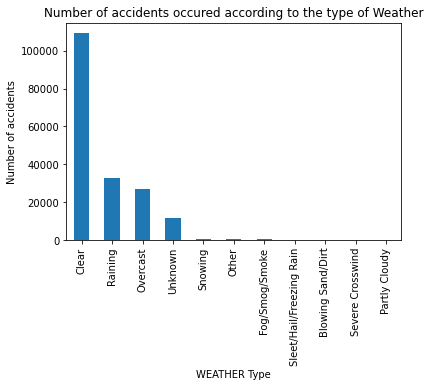

In [75]:
%matplotlib inline

df['WEATHER'].value_counts().plot.bar()

plt.title('Number of accidents occured according to the type of Weather')
plt.xlabel('WEATHER Type')
plt.ylabel('Number of accidents')

plt.show()

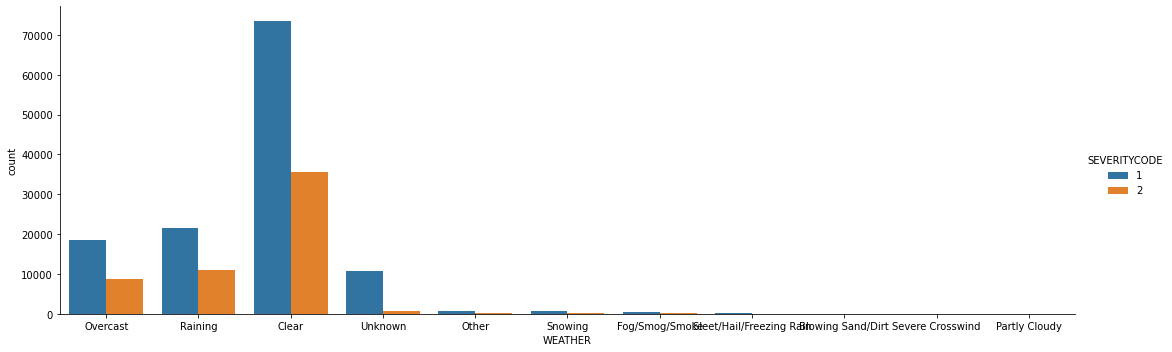

In [76]:
sns.catplot(x="WEATHER", hue="SEVERITYCODE", kind="count", data=df,height=5,aspect=3)

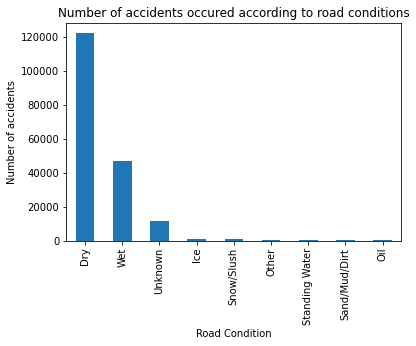

In [77]:
%matplotlib inline

df['ROADCOND'].value_counts().plot.bar()

plt.title('Number of accidents occured according to road conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of accidents')

plt.show()

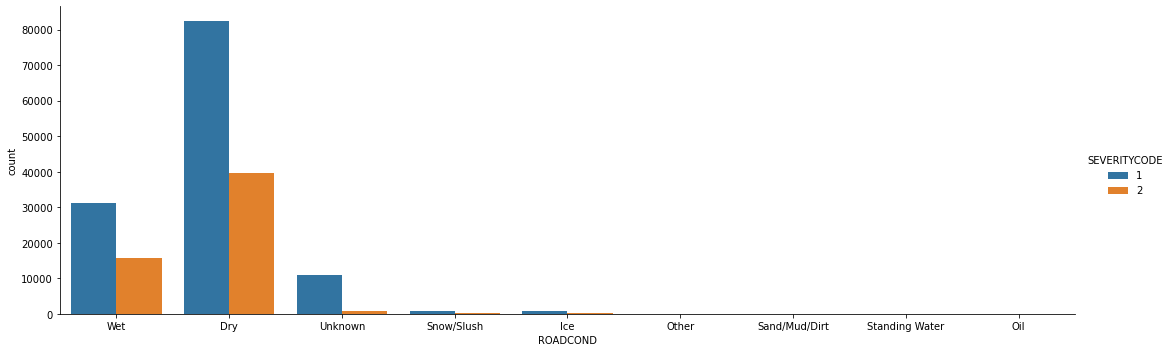

In [78]:
sns.catplot(x="ROADCOND", hue="SEVERITYCODE", kind="count", data=df,height=5,aspect=3)

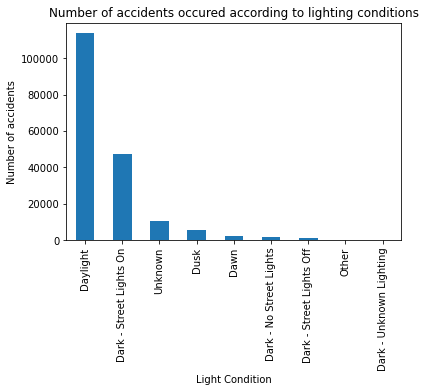

In [79]:
%matplotlib inline

df['LIGHTCOND'].value_counts().plot.bar()

plt.title('Number of accidents occured according to lighting conditions')
plt.xlabel('Light Condition')
plt.ylabel('Number of accidents')

plt.show()

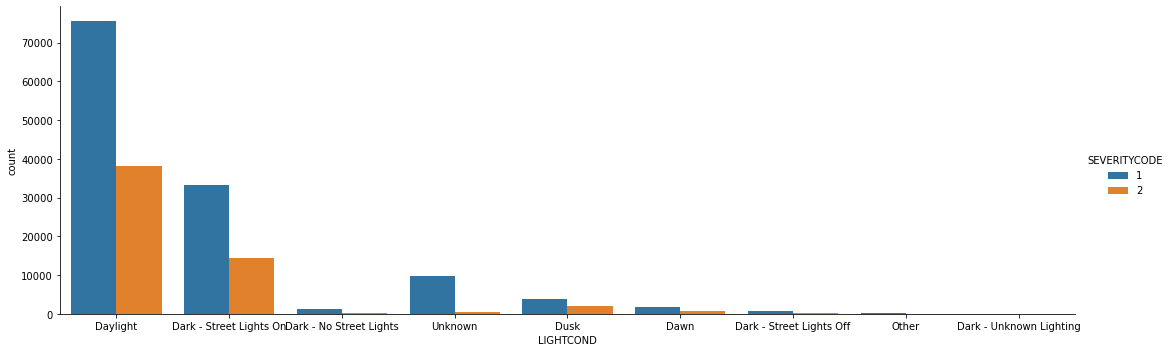

In [80]:
sns.catplot(x="LIGHTCOND", hue="SEVERITYCODE", kind="count", data=df,height=5,aspect=3)

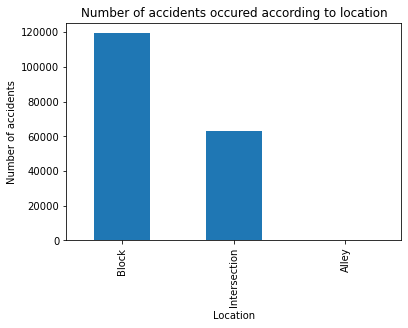

In [81]:
%matplotlib inline

df['ADDRTYPE'].value_counts().plot.bar()

plt.title('Number of accidents occured according to location')
plt.xlabel('Location')
plt.ylabel('Number of accidents')

plt.show()

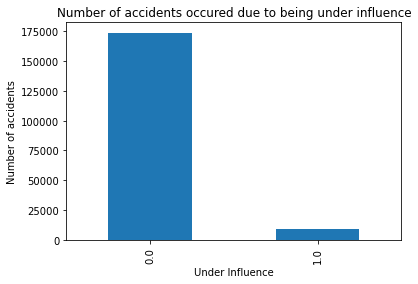

In [82]:
%matplotlib inline

df['UNDERINFL'].value_counts().plot.bar()

plt.title('Number of accidents occured due to being under influence')
plt.xlabel('Under Influence')
plt.ylabel('Number of accidents')

plt.show()

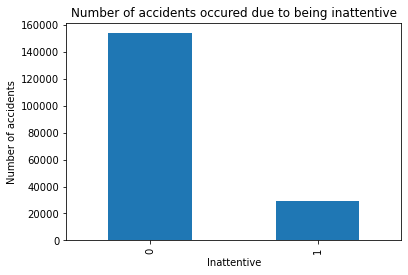

In [83]:
%matplotlib inline

df['INATTENTIONIND'].value_counts().plot.bar()

plt.title('Number of accidents occured due to being inattentive')
plt.xlabel('Inattentive')
plt.ylabel('Number of accidents')

plt.show()

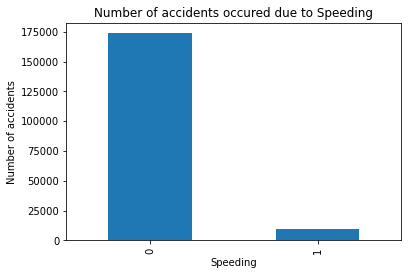

In [84]:
%matplotlib inline

df['SPEEDING'].value_counts().plot.bar()

plt.title('Number of accidents occured due to Speeding')
plt.xlabel('Speeding')
plt.ylabel('Number of accidents')

plt.show()

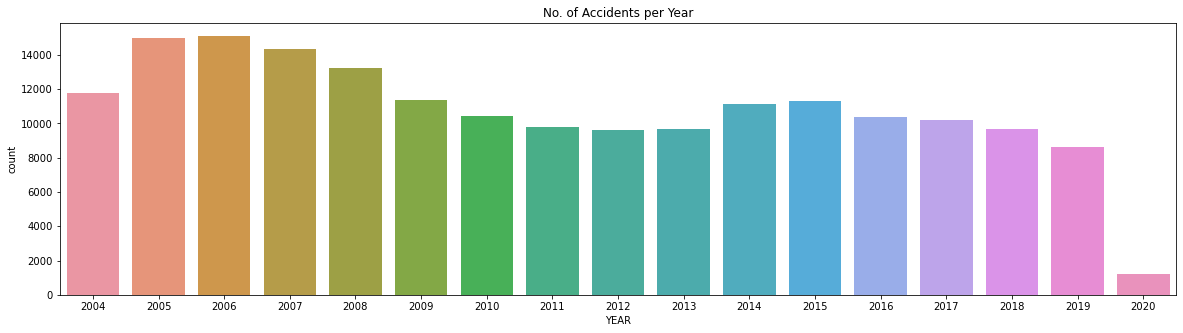

In [85]:
plt.figure(figsize=(20,5))
sns.countplot(x='YEAR',data=df)
plt.title('No. of Accidents per Year')
plt.show()

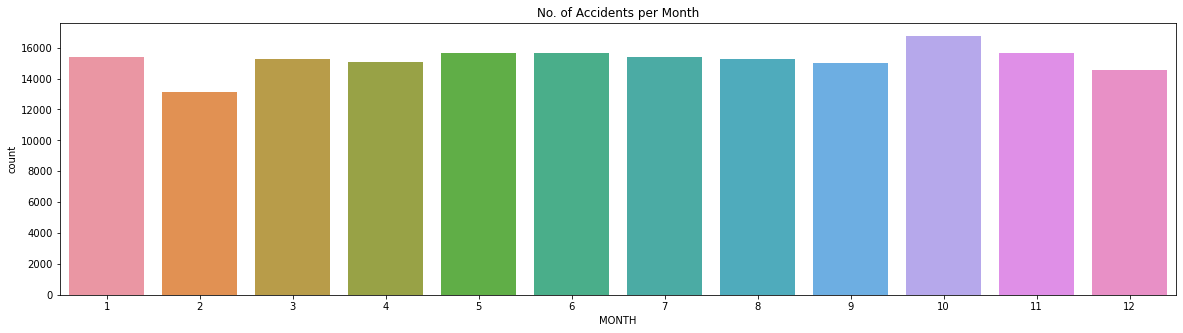

In [86]:
plt.figure(figsize=(20,5))
sns.countplot(x='MONTH',data=df)
plt.title('No. of Accidents per Month')
plt.show()

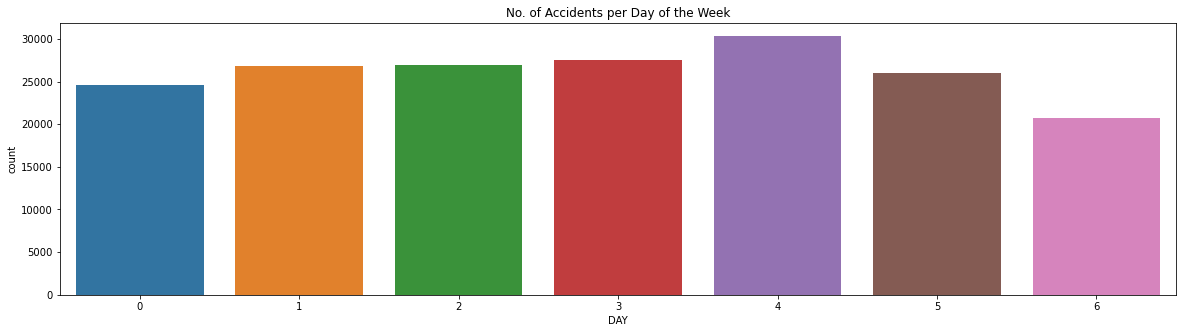

In [87]:
plt.figure(figsize=(20,5))
sns.countplot(x='DAY',data=df)
plt.title('No. of Accidents per Day of the Week')
plt.show()

In [88]:
df['UNDERINFL']=df['UNDERINFL'].astype('int64')
df.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
VEHCOUNT           int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING           int64
INATTENTIONIND     int64
UNDERINFL          int64
YEAR               int64
MONTH              int64
DAY                int64
dtype: object

In [89]:
data=pd.get_dummies(df,dtype='int64')
data.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'SPEEDING',
       'INATTENTIONIND', 'UNDERINFL', 'YEAR', 'MONTH', 'DAY', 'ADDRTYPE_Alley',
       'ADDRTYPE_Block', 'ADDRTYPE_Intersection', 'COLLISIONTYPE_Angles',
       'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe', 'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear',
       'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'LIGHTCOND_Dark -

In [90]:
data.rename(columns={'ADDRTYPE_Alley':'ALLEY','ADDRTYPE_Block':'BLOCK','ADDRTYPE_Intersection':'INTERSECTION',
                    'COLLISIONTYPE_Angles':'ANGLES','COLLISIONTYPE_Cycles':'CYCLES','COLLISIONTYPE_Head On':'HEAD ON',
                    'COLLISIONTYPE_Left Turn':'LEFT TURN','COLLISIONTYPE_Other':'COLLISION OTHER',
                    'COLLISIONTYPE_Parked Car':'PARKED CAR', 'COLLISIONTYPE_Pedestrian':'PEDESTRIAN',
                    'COLLISIONTYPE_Rear Ended':'REAR ENDED', 'COLLISIONTYPE_Right Turn':'RIGHT TURN',
                    'COLLISIONTYPE_Sideswipe':'SIDESWIPE', 'WEATHER_Blowing Sand/Dirt':'BLOWING SAND/DIRT', 'WEATHER Clear':'CLEAR',
                    'WEATHER_Fog/Smog/Smoke':'FOG/SMOG/SMOKE', 'WEATHER_Other':'WEATHER_OTHER', 'WEATHER_Overcast':'OVERCAST',
                    'WEATHER_Partly Cloudy':'CLOUDY', 'WEATHER_Raining':'RAINING', 'WEATHER_Severe Crosswind':'SEVERE CROSSWIND',
                    'WEATHER_Sleet/Hail/Freezing Rain':'SLEET/HAIL/FREEZING RAIN', 'WEATHER_Snowing':'SNOWING',
                    'WEATHER_Unknown':'WEATHER UNKNOWN', 'ROADCOND_Dry':'DRY', 'ROADCOND_Ice':'ICE', 'ROADCOND_Oil':'OIL',
                    'ROADCOND_Other':'ROADCOND OTHER', 'ROADCOND_Sand/Mud/Dirt':'SAND/MUD/DIRT', 'ROADCOND_Snow/Slush':'SNOW/SLUSH',
                    'ROADCOND_Standing Water':'STANDING WATER', 'ROADCOND_Unknown':'ROADCOND UNKNOWN', 'ROADCOND_Wet':'WET',
                    'LIGHTCOND_Dark - No Street Lights':'DARK - NO STREET LIGHTS',
                    'LIGHTCOND_Dark - Street Lights Off':'DARK - STREET LIGHTS OFF',
                    'LIGHTCOND_Dark - Street Lights On':'DARK - STREET LIGHTS ON',
                    'LIGHTCOND_Dark - Unknown Lighting':'DARK - LIGHTNING', 'LIGHTCOND_Dawn':'DAWN',
                    'LIGHTCOND_Daylight':'DAYLIGHT', 'LIGHTCOND_Dusk':'DUSK', 'LIGHTCOND_Other':'LIGHTCOND OTHER',
                    'LIGHTCOND_Unknown':'LIGHTCOND UNKOWN'},inplace=True)

data.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'SPEEDING',
       'INATTENTIONIND', 'UNDERINFL', 'YEAR', 'MONTH', 'DAY', 'ALLEY', 'BLOCK',
       'INTERSECTION', 'ANGLES', 'CYCLES', 'HEAD ON', 'LEFT TURN',
       'COLLISION OTHER', 'PARKED CAR', 'PEDESTRIAN', 'REAR ENDED',
       'RIGHT TURN', 'SIDESWIPE', 'BLOWING SAND/DIRT', 'WEATHER_Clear',
       'FOG/SMOG/SMOKE', 'WEATHER_OTHER', 'OVERCAST', 'CLOUDY', 'RAINING',
       'SEVERE CROSSWIND', 'SLEET/HAIL/FREEZING RAIN', 'SNOWING',
       'WEATHER UNKNOWN', 'DRY', 'ICE', 'OIL', 'ROADCOND OTHER',
       'SAND/MUD/DIRT', 'SNOW/SLUSH', 'STANDING WATER', 'ROADCOND UNKNOWN',
       'WET', 'DARK - NO STREET LIGHTS', 'DARK - STREET LIGHTS OFF',
       'DARK - STREET LIGHTS ON', 'DARK - LIGHTNING', 'DAWN', 'DAYLIGHT',
       'DUSK', 'LIGHTCOND OTHER', 'LIGHTCOND UNKOWN'],
      dtype='object')

In [91]:
data.SEVERITYCODE.value_counts()

1    126270
2     56625
Name: SEVERITYCODE, dtype: int64

In [92]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = data[data.SEVERITYCODE==1]
minority = data[data.SEVERITYCODE==2]
 
# Downsample majority class
majority_downsampled = resample(majority, 
                                replace=False,    # sample without replacement
                                n_samples=56625,     # to match minority class
                                random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority])
 
# Display new class counts
print('Display downsampled SEVERITYCODE data:','\n',downsampled.SEVERITYCODE.value_counts())

Display downsampled SEVERITYCODE data: 
 2    56625
1    56625
Name: SEVERITYCODE, dtype: int64


In [93]:
x= np.asarray(downsampled[['SPEEDING', 'INATTENTIONIND', 'UNDERINFL', 'YEAR',
                           'ALLEY', 'BLOCK', 'INTERSECTION', 'ANGLES', 'CYCLES',
                           'HEAD ON', 'LEFT TURN', 'COLLISION OTHER', 'PARKED CAR', 'PEDESTRIAN',
                           'REAR ENDED', 'RIGHT TURN', 'SIDESWIPE', 'BLOWING SAND/DIRT',
                           'WEATHER_Clear', 'FOG/SMOG/SMOKE', 'WEATHER_OTHER', 'OVERCAST',
                           'CLOUDY', 'RAINING', 'SEVERE CROSSWIND', 'SLEET/HAIL/FREEZING RAIN',
                           'SNOWING', 'WEATHER UNKNOWN', 'DRY', 'ICE', 'OIL', 'ROADCOND OTHER',
                           'SAND/MUD/DIRT', 'SNOW/SLUSH', 'STANDING WATER', 'ROADCOND UNKNOWN',
                           'WET', 'DARK - NO STREET LIGHTS', 'DARK - STREET LIGHTS OFF',
                           'DARK - STREET LIGHTS ON', 'DARK - LIGHTNING', 'DAWN', 'DAYLIGHT',
                            'DUSK', 'LIGHTCOND OTHER', 'LIGHTCOND UNKOWN']])

x[:5]

array([[   0,    0,    0, 2014,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0],
       [   0,    0,    0, 2018,    0,    0,    1,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0],
       [   0,    0,    0, 2012,    0,    1,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0, 2007,    0,    0,    1,

In [94]:
y= np.asarray(downsampled['SEVERITYCODE'])
y[:5]

array([1, 1, 1, 1, 1])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (101925, 46) (101925,)
Test set: (11325, 46) (11325,)


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression().fit(X_train,y_train)

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
LR_yhat = LR.predict(X_test)
LR_yhat

array([2, 2, 2, ..., 1, 1, 2])

In [98]:
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

LR_acc= round(metrics.accuracy_score(y_test, LR_yhat),2)
f1= round(f1_score(y_test,LR_yhat),2)

print('Logistic Regression accuracy: ',LR_acc)
print('Logistic Regression f1 score: ',f1)

Logistic Regression accuracy:  0.69
Logistic Regression f1 score:  0.64


In [99]:
from sklearn import metrics,tree
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier()
Tree= Tree.fit(X_train,y_train)

# tree.plot_tree(Tree)
Tree_yhat = Tree.predict(X_test)

f2 = round(f1_score(y_test, Tree_yhat),2)
Tree_acc= round(metrics.accuracy_score(y_test,Tree_yhat),2)

print('Tree accuracy:', Tree_acc)
print('Tree f1 score: ', f2)

Tree accuracy: 0.68
Tree f1 score:  0.66


In [100]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 20).fit(X_train,y_train)
KNN_yhat = neigh.predict(X_test)

KNN_acc = round(metrics.accuracy_score(y_test, KNN_yhat),2)
f3= round(f1_score(y_test,KNN_yhat),2)

print('KNN accuracy: ', KNN_acc)
print('KNN f1 score: ',f3)

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,20),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train) 

SVM_yhat = clf.predict(X_test)

SVM_acc = metrics.accuracy_score(y_test,SVM_yhat)
f4= f1_score(y_test,SVM_yhat)

print('SVM accuracy: ', SVM_acc)
print('SVM f1 score: ',f4)

In [ ]:
from sklearn.metrics import jaccard_score
# Logistic Regression
jss1 = round(jaccard_score(y_test, LR_yhat), 2)

# Decision Tree
jss2 = round(jaccard_score(y_test, Tree_yhat), 2)

# KNN
jss3 = round(jaccard_score(y_test, KNN_yhat), 2)

# Support Vector Machine
jss4 = round(jaccard_score(y_test, SVM_yhat), 2)

jss_list = [jss1, jss2, jss3, jss4]
jss_list

In [ ]:
from sklearn.metrics import jaccard_score
# Logistic Regression
jss1 = round(jaccard_score(y_test, LR_yhat), 2)

# Decision Tree
jss2 = round(jaccard_score(y_test, Tree_yhat), 2)

# KNN
jss3 = round(jaccard_score(y_test, KNN_yhat), 2)

# Support Vector Machine
jss4 = round(jaccard_score(y_test, SVM_yhat), 2)

jss_list = [jss1, jss2, jss3, jss4]
jss_list

In [ ]:
accuracy_df1= accuracy_df.transpose()
accuracy_df1.columns.name= 'Algorithm'
accuracy_df1